In [1]:
import collections
import itertools
import json
import datetime
import time

#import ijson
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import numpy as np
import pandas as pd
import tqdm

In [2]:
LANGUAGES = {
    "python": "Python",
    "r": "R",
    "javascript": "Javascript",
    "java": "Java",
    "cpp": "C++",
    "php": "PHP",
    "ruby": "Ruby",
    "perl": "Perl",
    "rust": "Rust",
    "swift": "Swift",
    "objectivec": "Objective C",
    "c#": "C#",
}

## Heaps's Law

Processing python
	 Opening resources...
	...done.
	Segments formed (took 0.75 seconds).
	Libs Fit performed; alpha=0.7303213136460464 c=2.00698323699181 r2_libs=0.999625096270831
	Pairs Fit performed; alpha=0.8583987598721317 c=1.9221349902699505 r2_pairs=0.9992538771526712
Processing r
	 Opening resources...
	...done.
	Segments formed (took 0.35 seconds).
	Libs Fit performed; alpha=0.6541387079573763 c=2.4494236537658316 r2_libs=0.996559015316297
	Pairs Fit performed; alpha=1.0423015561870501 c=0.14839700972699135 r2_pairs=0.996670630906581
Processing javascript
	 Opening resources...
	...done.
	Segments formed (took 0.2 seconds).
	Libs Fit performed; alpha=0.7695431247608898 c=1.8673919727591108 r2_libs=0.9951945453699734
	Pairs Fit performed; alpha=0.9742059782879763 c=0.7989658836039737 r2_pairs=0.9884764220117952
Processing java
	 Opening resources...
	...done.
	Segments formed (took 0.3 seconds).
	Libs Fit performed; alpha=0.8017736462826618 c=0.25195624954772905 r2_libs=0.99740

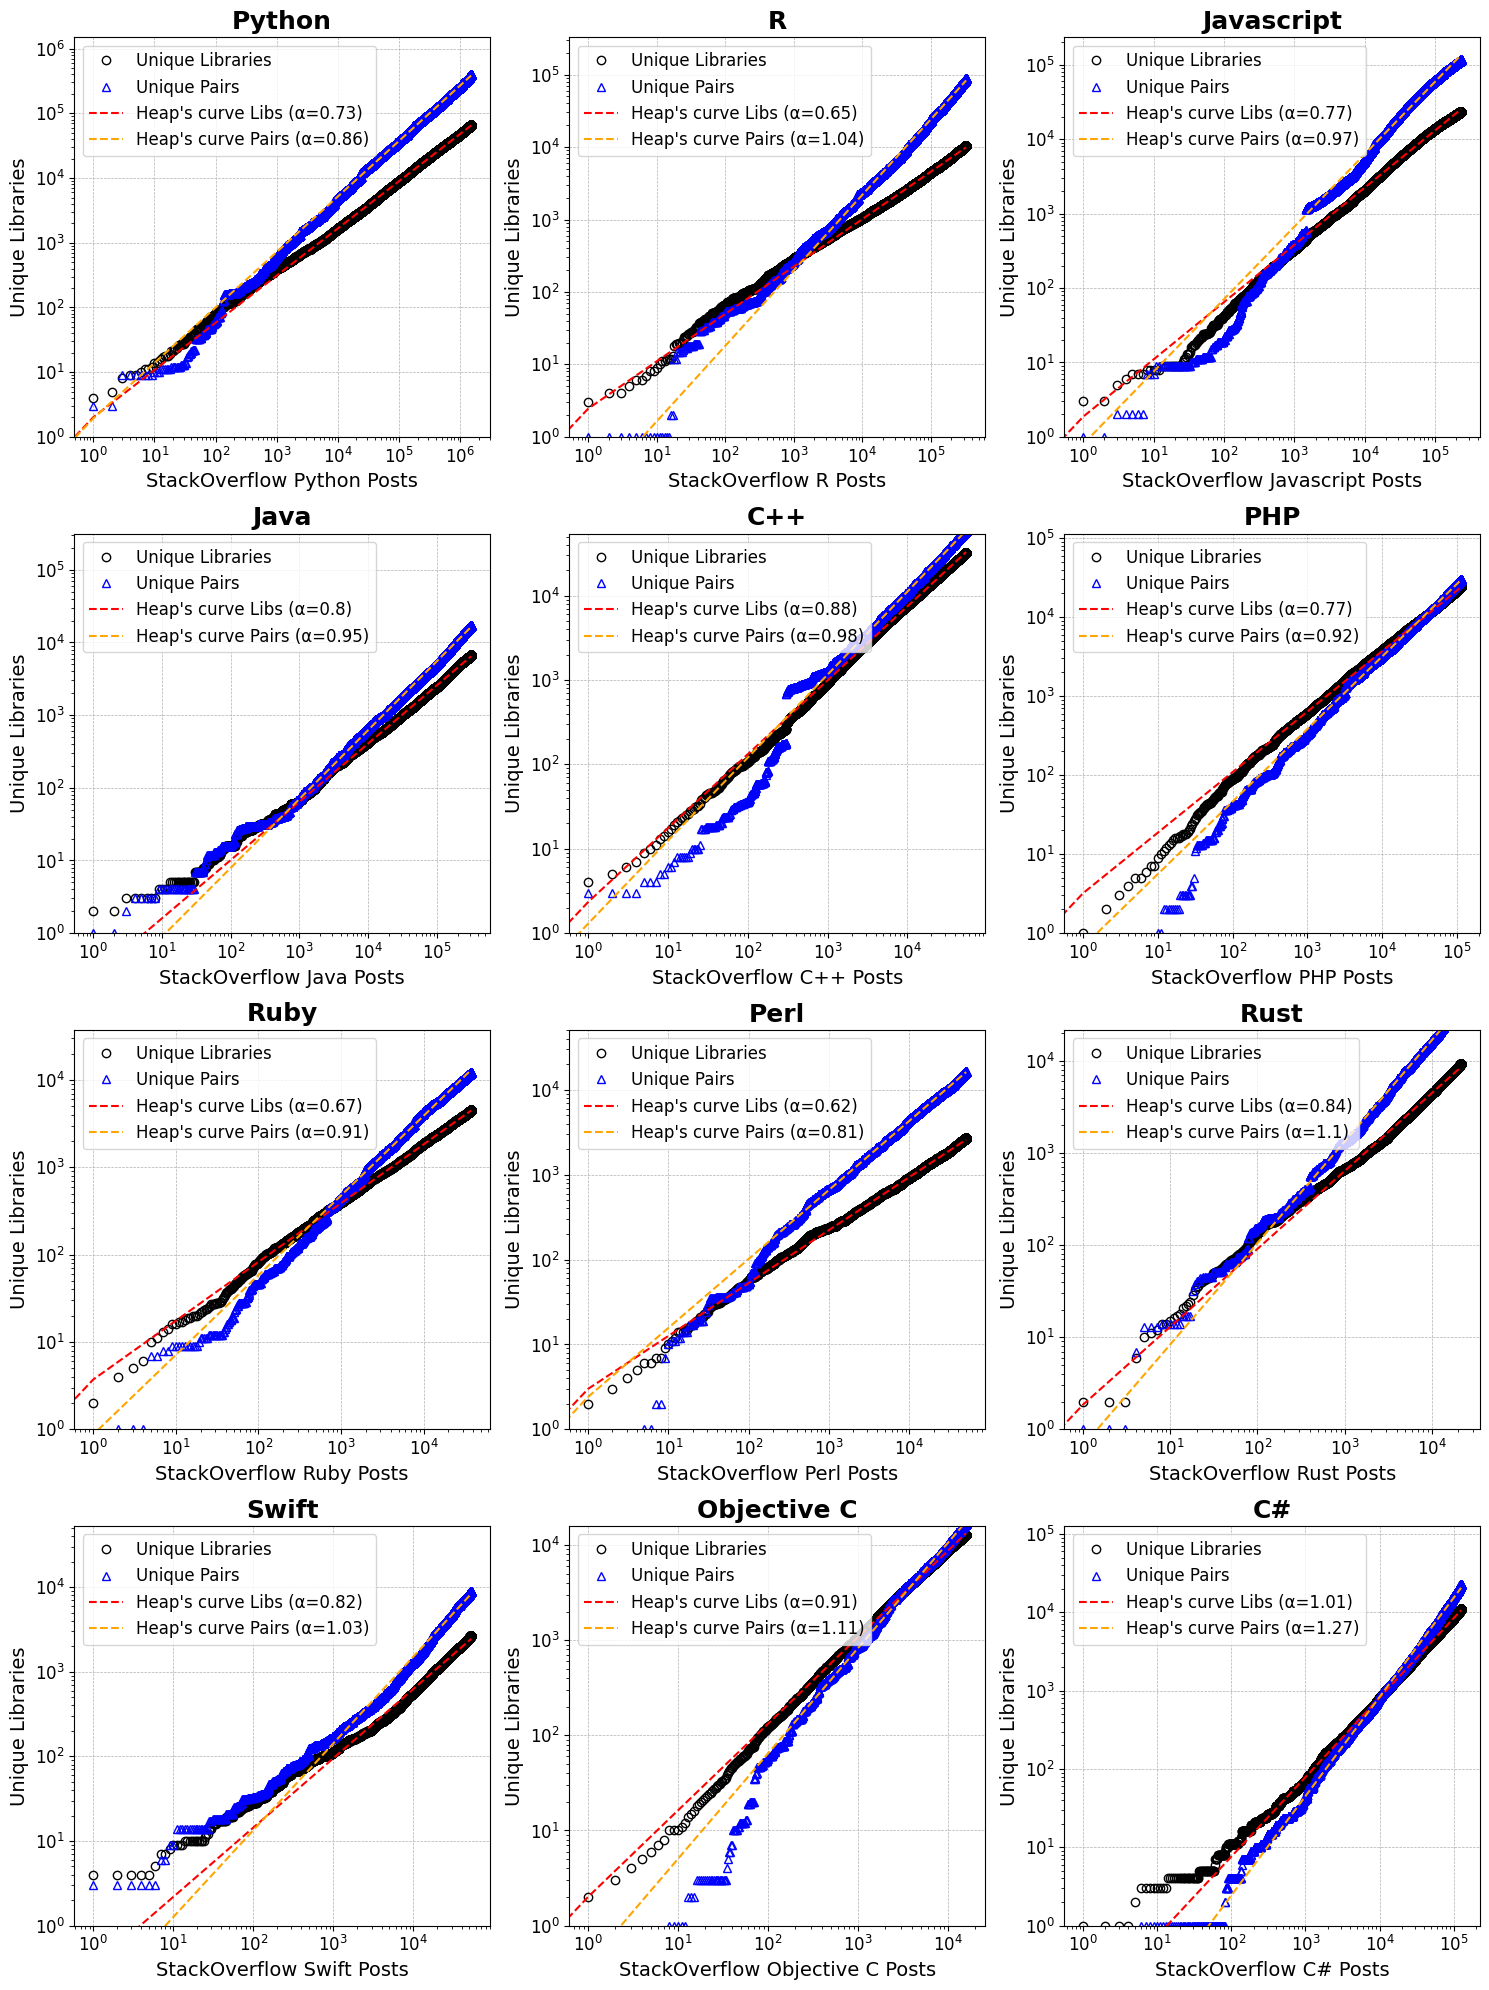

In [8]:
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import ScalarFormatter, LogFormatterExponent,LogFormatterMathtext


import time
from sklearn.linear_model import LinearRegression


%matplotlib inline

lib_alphas = {}
lib_r2 = {}
pair_alphas = {}
pair_r2 = {}

APPEARANCE_LOWER_LIMIT = 0

square_size = 5
rows, columns = (len(LANGUAGES) + 2) // 3, 3
fig = plt.figure(figsize=(square_size * columns, square_size * rows))
gs = GridSpec(rows, columns, figure=fig)
plt.subplots_adjust(hspace=0.8, wspace=0.3)

for index, language in enumerate(LANGUAGES):
    print(f"Processing {language}")
    path_to_lib = f"data/results/{language}"

    i, j = index // columns, index % columns
    ax = fig.add_subplot(gs[i, j])
    
    print("\t Opening resources...")
    # with open(f"{path_to_lib}/{language}_post_to_libs.json") as handle:
    #     post_to_libs = json.load(handle)
    
    with open(f"{path_to_lib}/{language}_all_libs_dates.json") as handle:
        all_libs_dates = json.load(handle)
        
    with open(f"{path_to_lib}/{language}_all_pairs_dates.json") as handle:
        all_pairs_dates = json.load(handle)
    print("\t...done.")

    libs_to_count = {k: len(v) for k, v in all_libs_dates.items()}

    with open(f"{path_to_lib}/{language}_")


    
    
    t0 = time.time()
    xs_libs = np.array([d[0] for d in post_to_libs['distinct_libs_plot']])
    ys_libs = np.array([d[1] for d in post_to_libs['distinct_libs_plot']])
    xs_pairs = [d[0] for d in post_to_libs['distinct_pairs_plot']]
    ys_pairs = [d[1] for d in post_to_libs['distinct_pairs_plot']]
    t1 = time.time()
    print(f"\tSegments formed (took {round(t1 - t0, 2)} seconds).")

    
    ###########################
    libs_count = [d[1] for d in post_to_libs['distinct_libs_plot']]
    xs = np.array(range(1, len(libs_count) + 1))
    xs_transformed = np.log(xs).reshape(-1 ,1 )
    counts_transformed = np.log(np.array(libs_count) + 1)
    
    model = LinearRegression()
    model.fit(xs_transformed, counts_transformed)
    
    alpha_libs = model.coef_[0]
    log_c_libs = model.intercept_
    c_libs = np.exp(log_c_libs)
    r2_libs = model.score(xs_transformed, counts_transformed)
    print(f"\tLibs Fit performed; alpha={alpha_libs} c={c_libs} r2_libs={r2_libs}")
    
    lib_alphas[language] = alpha_libs
    lib_r2[language] = r2_libs

    ###
    pairs_count = [d[1] for d in post_to_libs['distinct_pairs_plot']]
    xs = np.array(range(1, len(pairs_count) + 1))
    xs_transformed = np.log(xs).reshape(-1 ,1 )
    counts_transformed = np.log(np.array(pairs_count) + 1)
    
    model = LinearRegression()
    model.fit(xs_transformed, counts_transformed)
    
    alpha_pairs = model.coef_[0]
    log_c_pairs = model.intercept_
    c_pairs = np.exp(log_c_pairs)
    r2_pairs = model.score(xs_transformed, counts_transformed)
    print(f"\tPairs Fit performed; alpha={alpha_pairs} c={c_pairs} r2_pairs={r2_pairs}")
    
    pair_alphas[language] = alpha_pairs
    pair_r2[language] = r2_pairs
    ############################

    xs = list(range(len(xs_libs)))
    
    ax.loglog(xs, [ys_libs[i] for i in xs], "o", color="black", markerfacecolor='none', label="Unique Libraries")
    ax.loglog(xs, [ys_pairs[i] for i in xs], "^", color="blue", markerfacecolor='none', label="Unique Pairs")
    ax.loglog(xs, [c_libs*x**alpha_libs for x in xs], "--", color="red", label=f"Heap's curve Libs (α={round(alpha_libs, 2)})")
    ax.loglog(xs, [c_pairs*x**alpha_pairs for x in xs], "--", color="orange", label=f"Heap's curve Pairs (α={round(alpha_pairs, 2)})")

    
    ax.set_ylim(1, len(xs_libs))
    ax.set_title(f'{LANGUAGES[language]}', fontsize=18, fontweight='bold')
    ax.legend(fontsize=12, loc="upper left")
    ax.grid(True, which="major", linestyle='--', linewidth=0.5)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_xlabel(f'StackOverflow {LANGUAGES[language]} Posts', fontsize=14)  # Add an appropriate X-axis label
    ax.set_ylabel('Unique Libraries', fontsize=14)  # Add an appropriate Y-axis label
    ax.set_xscale('log')
    ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))


   # Turn off scientific notation for the y-axis
    #ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
    #ax.ticklabel_format(style='plain', axis='y')

    # Turn off scientific notation for the x-axis
    #ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=False))
    #ax.ticklabel_format(style='plain', axis='x')

    #plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.LogFormatterExponent(base=10))


#fig.suptitle("Heap's Law for Programming Languages", fontsize=22, fontweight='bold', y=1.02)
plt.tight_layout()

plt.savefig("heaps_12_pairs.png")
plt.show()

In [13]:
post_to_libs['distinct_pairs_plot']

[['2008-08-02T01:15:42.123', 0],
 ['2008-08-04T01:31:31.157', 0],
 ['2008-08-05T03:00:24.750', 0],
 ['2008-08-07T14:59:15.517', 0],
 ['2008-08-08T09:39:26.223', 0],
 ['2008-08-12T23:33:06.670', 0],
 ['2008-08-13T23:01:01.477', 1],
 ['2008-08-15T03:43:38.110', 1],
 ['2008-08-15T17:58:18.483', 1],
 ['2008-08-17T13:01:02.030', 1],
 ['2008-08-18T09:33:29.610', 1],
 ['2008-08-18T13:31:30.533', 1],
 ['2008-08-19T01:34:07.550', 1],
 ['2008-08-19T10:50:55.710', 1],
 ['2008-08-19T20:14:36.243', 1],
 ['2008-08-20T06:03:18.313', 1],
 ['2008-08-20T14:32:49.883', 1],
 ['2008-08-20T15:14:37.193', 1],
 ['2008-08-20T19:16:07.907', 1],
 ['2008-08-20T23:06:42.563', 1],
 ['2008-08-21T13:17:05.203', 1],
 ['2008-08-21T14:48:34.283', 1],
 ['2008-08-21T19:47:39.070', 1],
 ['2008-08-23T13:58:02.860', 1],
 ['2008-08-23T14:31:21.780', 1],
 ['2008-08-24T17:17:51.763', 1],
 ['2008-08-25T15:24:20.280', 1],
 ['2008-08-26T13:20:52.643', 1],
 ['2008-08-27T01:03:17.197', 1],
 ['2008-08-27T21:05:41.940', 1],
 ['2008-08

In [15]:
lib_alphas

{'python': 0.7303213136460464,
 'r': 0.6541387079573763,
 'javascript': 0.7695431247608898,
 'java': 0.8017736462826618,
 'cpp': 0.8758595830396578,
 'php': 0.7656745933033801,
 'ruby': 0.6733120084419743,
 'perl': 0.6235550411767944,
 'rust': 0.8447762346539271,
 'swift': 0.8193347424889602,
 'objectivec': 0.9099744766799154,
 'c#': 1.0141572448501346}

In [16]:
pair_alphas

{'python': 0.8583987598721317,
 'r': 1.0423015561870501,
 'javascript': 0.9742059782879763,
 'java': 0.9480761164140705,
 'cpp': 0.9836210642633045,
 'php': 0.9174198392631232,
 'ruby': 0.912593788063501,
 'perl': 0.8127550773488171,
 'rust': 1.100125027748165,
 'swift': 1.0261022053070217,
 'objectivec': 1.1073174129117087,
 'c#': 1.2660912825594002}

## Zip's Law

Processing python
R^2: 0.9965
Processing r
R^2: 0.9930
Processing javascript
R^2: 0.9990
Processing java
R^2: 0.9972
Processing cpp
R^2: 0.9975
Processing php
R^2: 0.9984
Processing ruby
R^2: 0.9971
Processing perl
R^2: 0.9968
Processing rust
R^2: 0.9986
Processing swift
R^2: 0.9955
Processing objectivec
R^2: 0.9921
Processing c#
R^2: 0.9981


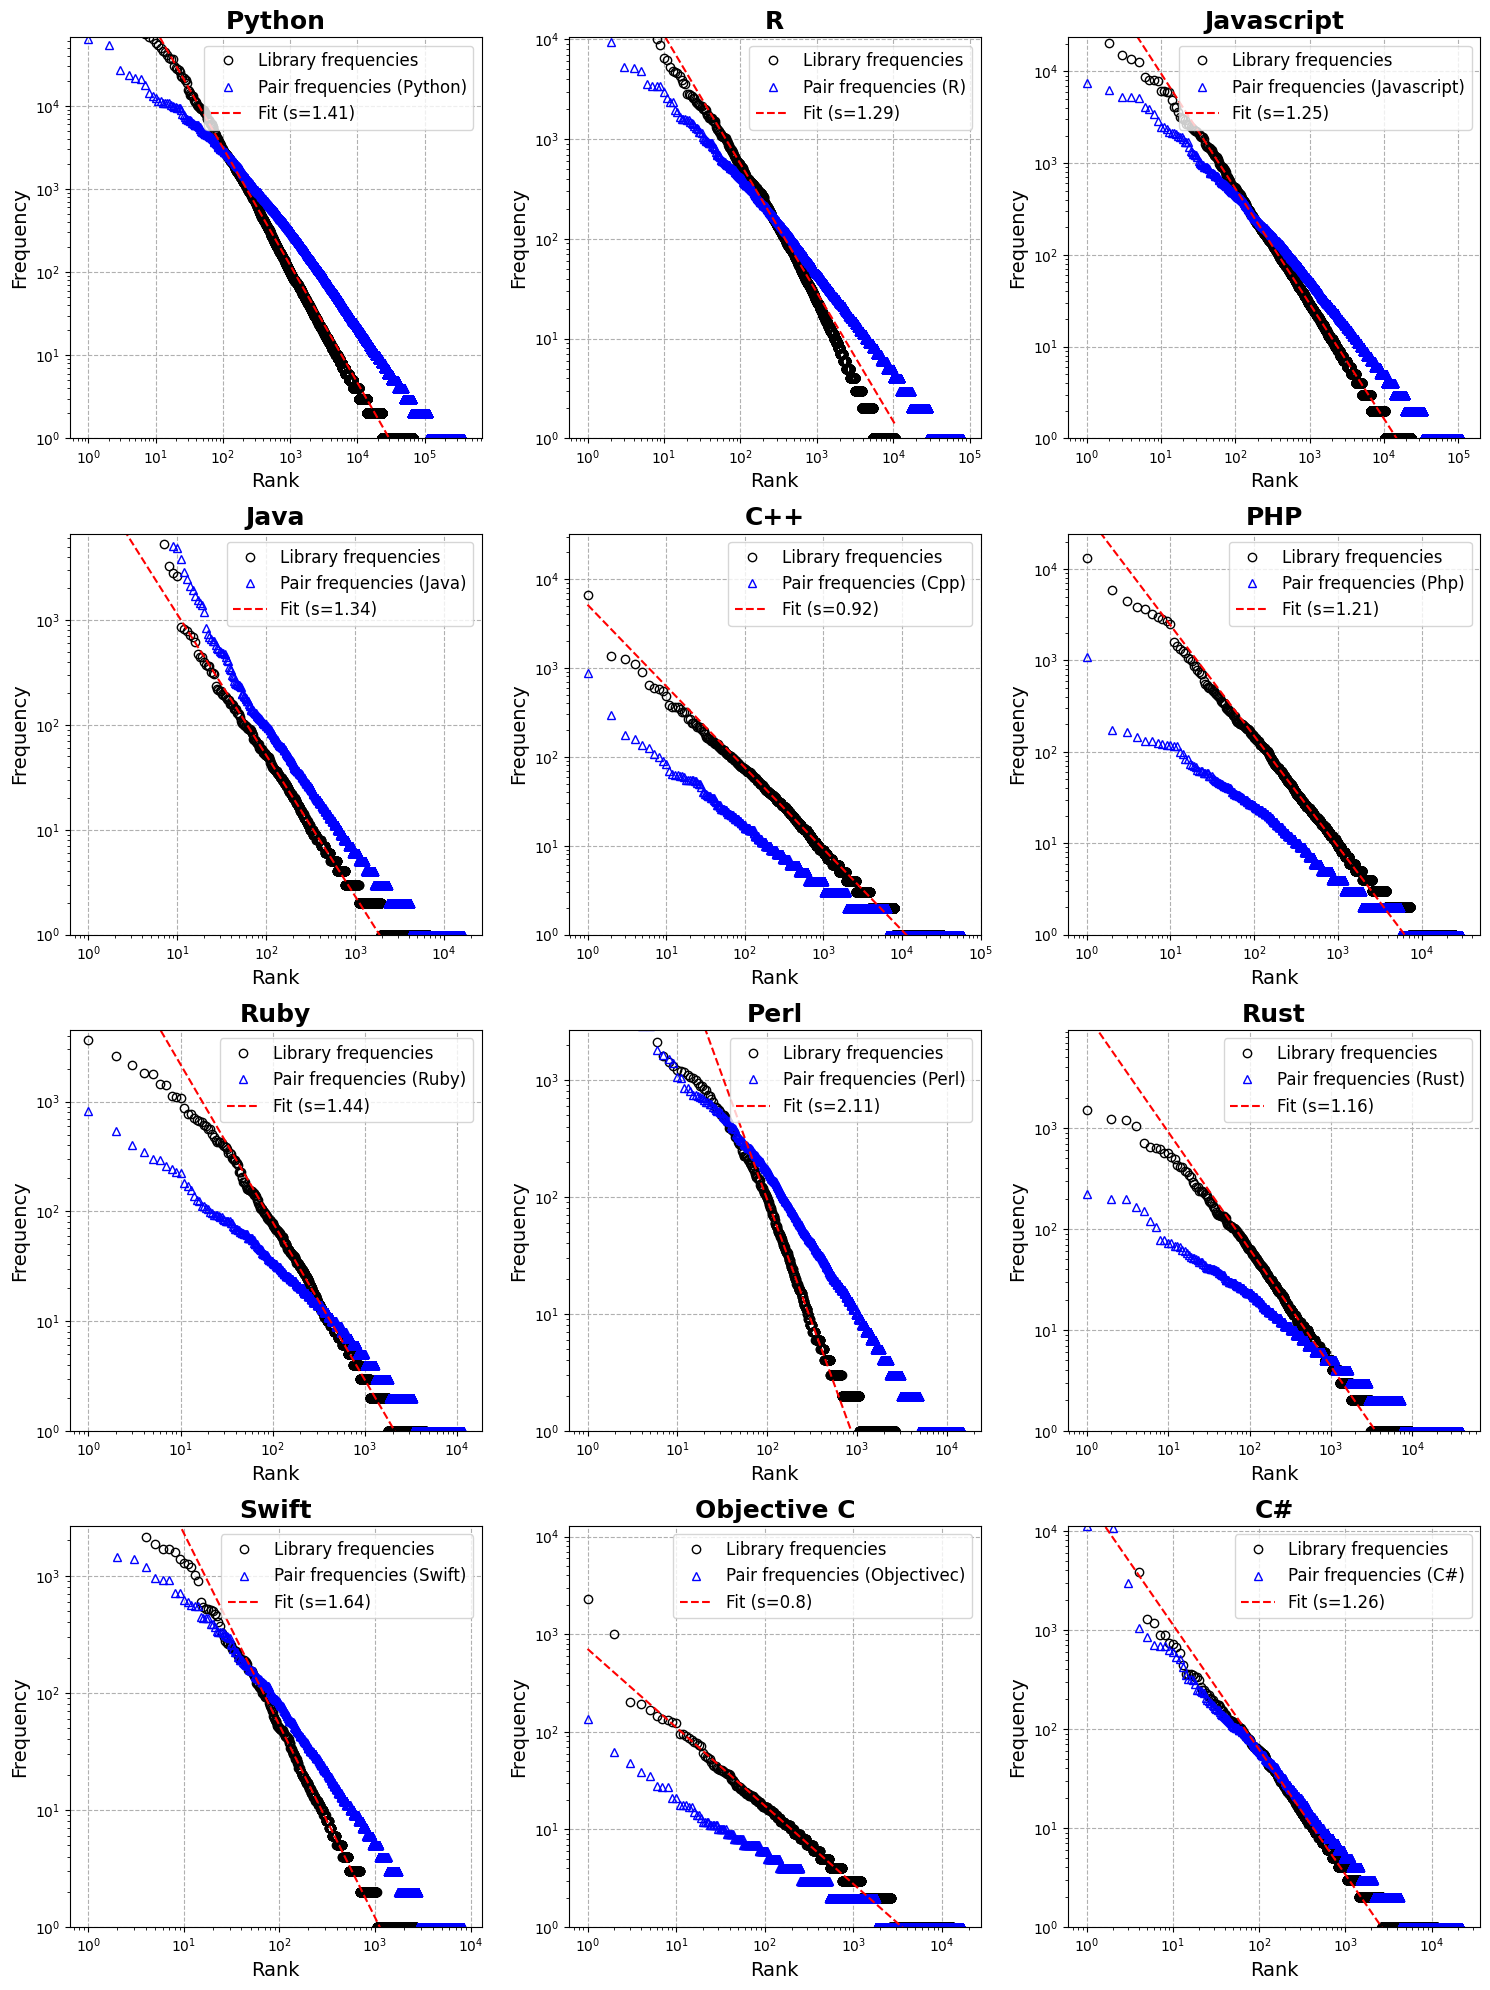

In [4]:
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.optimize import curve_fit

s_values = {}
r2_values = {}

def read_json(filepath):
    try:
        with open(filepath) as handle:
            return json.load(handle)
    except FileNotFoundError:
        print(f"File {filepath} not found.")
        return {}
    except json.JSONDecodeError:
        print(f"Error decoding JSON from file {filepath}.")
        return {}

def plot_language_data(ax, language, path_to_lib):
    print(f"Processing {language}")
    post_to_libs = read_json(f"{path_to_lib}/{language}_post_to_libs.json")
    all_libs_dates = read_json(f"{path_to_lib}/{language}_all_libs_dates.json")
    all_pairs_dates = read_json(f"{path_to_lib}/{language}_all_pairs_dates.json")

    if not all_libs_dates:
        return

    libs_freq = {k: len(v) for k, v in all_libs_dates.items()}
    sorted_libs_freq = sorted(libs_freq.items(), key=lambda x: x[1], reverse=True)
    sorted_libs_freq_values = [x[1] for x in sorted_libs_freq]

    pairs_freq = {k:len(v) for k, v in all_pairs_dates.items()}
    sorted_pairs_freq = sorted(pairs_freq.items(), key=lambda x: x[1], reverse=True)
    sorted_pairs_freq_values = [x[1] for x in sorted_pairs_freq]

    xs = range(1, len(sorted_libs_freq) + 1)
    ax.loglog(xs, sorted_libs_freq_values,  "o",
              color="black", markerfacecolor='none',
              label=f"Library frequencies")

    ax.loglog(range(1, len(sorted_pairs_freq) + 1), sorted_pairs_freq_values,  "^",
              color="blue", markerfacecolor='none',
              label=f"Pair frequencies ({language.capitalize()})")

    ranks = np.arange(1, len(sorted_libs_freq_values) + 1)
    frequencies = np.array(sorted_libs_freq_values)

    def zipf(rank, s, k):
        return k / (rank ** s)

    region_start = 100
    region_end = 1000

    if len(ranks) < region_end:
        region_end = len(ranks)

    (s, k), cov = curve_fit(
        zipf,
        ranks[region_start:region_end],
        frequencies[region_start:region_end],
    )
    fitted_frequencies = zipf(ranks, s, k)
    
    # Calculate the residual sum of squares (SS_res)
    ss_res = np.sum((frequencies[region_start:region_end] - fitted_frequencies[region_start:region_end]) ** 2)
    
    # Calculate the total sum of squares (SS_tot)
    ss_tot = np.sum((frequencies[region_start:region_end] - np.mean(frequencies[region_start:region_end])) ** 2)
    
    # Calculate the R^2 value
    r_squared = 1 - (ss_res / ss_tot)
    
    print(f"R^2: {r_squared:.4f}")
    s_values[language] = round(s, 2)
    r2_values[language] = r_squared
    
    ax.loglog(xs, fitted_frequencies, "r--", label=f"Fit (s={round(s, 2)})")
    ax.set_ylim(1, len(xs))
    ax.set_title(f'{LANGUAGES[language]}', fontsize=18, fontweight='bold')
    ax.set_xlabel('Rank', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    ax.grid(True, which="major", ls="--")
    ax.legend(fontsize=12, loc="upper right")

    # Turn off scientific notation for the y-axis
    #ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
    #ax.ticklabel_format(style='plain', axis='y')
    
    # Turn off scientific notation for the x-axis
    #ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=False))
    #ax.ticklabel_format(style='plain', axis='x')

rows, columns = (len(LANGUAGES) + 2) // 3, 3
fig = plt.figure(figsize=(15, 5 * rows))
gs = GridSpec(rows, columns, figure=fig)
plt.subplots_adjust(hspace=0.8, wspace=0.3) 

for index, language in enumerate(LANGUAGES):
    i, j = index // columns, index % columns
    ax = fig.add_subplot(gs[i, j])
    plot_language_data(ax, language, f"data/results/{language}")

#fig.suptitle("Zip's Law for Programming Languages", fontsize=22, fontweight='bold', y=1.01)
plt.tight_layout()
plt.savefig("zips_12_pairs.png")
plt.show()


In [ ]:
[round(f(s_values.values()), 2) for f in (min, max, lambda x: sum(x) / len(x))]

In [ ]:
np.mean(list(r2_values.values()))

In [20]:
lib_alphas, pair_alphas

({'python': 0.7303213136460464,
  'r': 0.6541387079573763,
  'javascript': 0.7695431247608898,
  'java': 0.8017736462826618,
  'cpp': 0.8758595830396578,
  'php': 0.7656745933033801,
  'ruby': 0.6733120084419743,
  'perl': 0.6235550411767944,
  'rust': 0.8447762346539271,
  'swift': 0.8193347424889602,
  'objectivec': 0.9099744766799154,
  'c#': 1.0141572448501346},
 {'python': 0.8583987598721317,
  'r': 1.0423015561870501,
  'javascript': 0.9742059782879763,
  'java': 0.9480761164140705,
  'cpp': 0.9836210642633045,
  'php': 0.9174198392631232,
  'ruby': 0.912593788063501,
  'perl': 0.8127550773488171,
  'rust': 1.100125027748165,
  'swift': 1.0261022053070217,
  'objectivec': 1.1073174129117087,
  'c#': 1.2660912825594002})

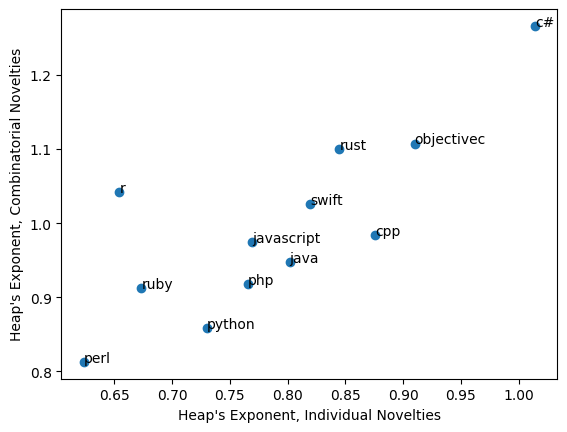

In [37]:
plt.scatter(
    [lib_alphas[k] for k in sorted(lib_alphas.keys())],
    [pair_alphas[k] for k in sorted(pair_alphas.keys())]
)
sorted_keys = sorted(lib_alphas.keys())
for i, name in enumerate(sorted_keys):
    plt.text(lib_alphas[name], pair_alphas[name], name)

plt.xlabel("Heap's Exponent, Individual Novelties")
plt.ylabel("Heap's Exponent, Combinatorial Novelties")
plt.savefig("heaps_indiv_to_pair.png")